<a href="https://colab.research.google.com/github/GDurgaGowri/Predictions_ML/blob/main/Txtclassificationbilstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from keras.preprocessing import sequence
from keras.datasets import imdb

# Load and preprocess data
max_words = 500
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=1000)
train_x = sequence.pad_sequences(train_x, maxlen=max_words)
test_x = sequence.pad_sequences(test_x, maxlen=max_words)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model parameters
embedding_dim = 64
max_words = 500  # Ensure this matches the padding length
num_words = 1000  # Vocabulary size (as specified in the imdb.load_data)

# Build the BiLSTM model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_words),
    Bidirectional(LSTM(64, return_sequences=True)),  # BiLSTM layer with 64 units
    Dropout(0.5),  # Dropout to reduce overfitting
    Bidirectional(LSTM(32)),  # Second BiLSTM layer with 32 units
    Dense(32, activation='relu'),  # Dense layer with ReLU activation
    Dropout(0.5),  # Additional dropout layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=1,
    batch_size=512,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predicting and evaluating model performance
pred_y = (model.predict(test_x) > 0.5).astype("int32")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

40/40 ━━━━━━━━━━━━━━━━━━━━ 318s 8s/step - accuracy: 0.5289 - loss: 0.6906 - val_accuracy: 0.5026 - val_loss: 0.7052
782/782 - 156s - 199ms/step - accuracy: 0.5012 - loss: 0.7046

Test Accuracy: 0.5012
782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 205ms/step


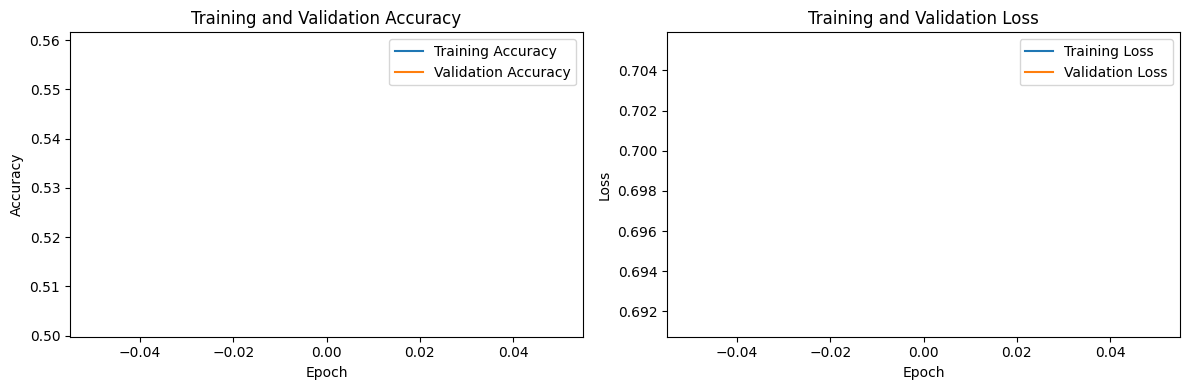

782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 217ms/step

Classification Report:
               precision    recall  f1-score   support

    Negative       0.51      0.05      0.10     12500
    Positive       0.50      0.95      0.66     12500

    accuracy                           0.50     25000
   macro avg       0.51      0.50      0.38     25000
weighted avg       0.51      0.50      0.38     25000



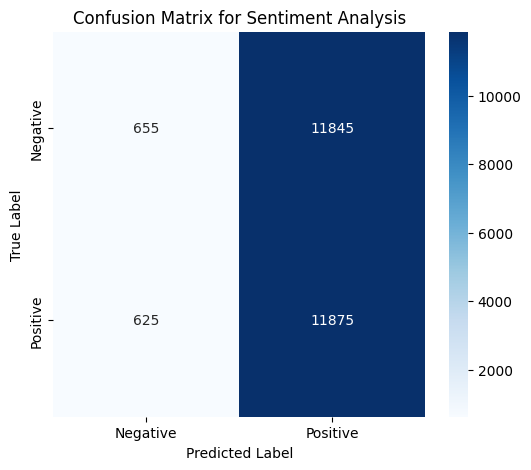

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plotting training & validation accuracy and loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Predicting and evaluating model performance
pred_y = (model.predict(test_x) > 0.5).astype("int32")

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(test_y, pred_y, target_names=['Negative', 'Positive']))
conf_matrix = confusion_matrix(test_y, pred_y)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()
